In [1]:
import pandas as pd
import re, nltk
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_json("C:/Users/Parikshit/Downloads/News/news.zip", lines = True)
df.columns

Index(['category', 'headline', 'authors', 'link', 'short_description', 'date'], dtype='object')

In [3]:
df.head(2)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26


In [4]:
df.shape

(200853, 6)

In [5]:
df['category'].nunique()

41

In [6]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
category             200853 non-null object
headline             200853 non-null object
authors              200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
date                 200853 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [8]:
df=df.drop(['link'],axis=1)

In [9]:
df=df.drop(['date'],axis=1)

In [10]:
df.head(2)

,category,headline,authors,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.


In [11]:
len(df[df['short_description'] == ''])

19712

In [12]:
df.drop(df[df['short_description'] == '' ].index, inplace=True)

In [13]:
df['authors'].nunique()

27136

In [14]:
df.drop(df[df['authors'] == '' ].index, inplace=True)

In [15]:
len(df[df['headline'] == ''])

1

In [16]:
df.drop(df[df['headline'] == '' ].index, inplace=True)

In [17]:
df.head(3)

,category,headline,authors,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...


In [18]:
df.shape

(148983, 4)

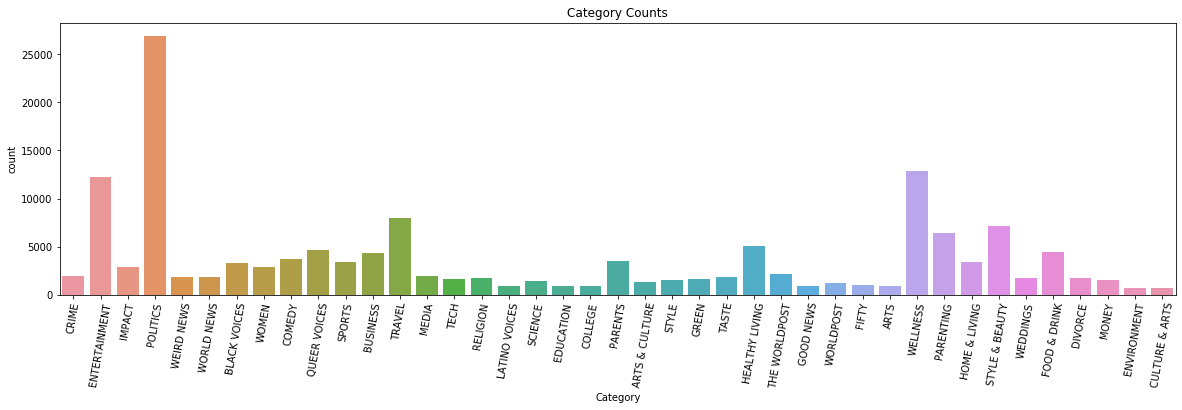

In [19]:
figure, ax = plt.subplots(1, 1, figsize = (20, 5))

ax = sns.countplot(df['category'])
ax.set_title("Category Counts")
ax.set_xlabel("Category")
# Manipulate the labels to make them more readable
ax.set_xticklabels([x for x in ax.get_xticklabels()], rotation=80)
plt.show()

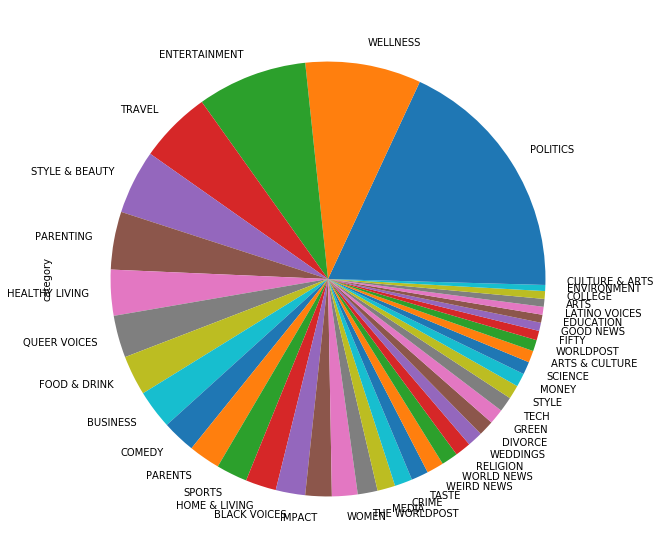

In [20]:
figure, ax = plt.subplots(1, 1, figsize = (10, 10))
df['category'].value_counts().plot.pie()

In [21]:
import string
all_punctuations = string.punctuation + '‘’,:”][],' 

In [22]:
def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [23]:
def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [24]:
#Method to lemmatize the words in the data
lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

#Method to perform a complete cleaning
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [25]:
df['short_discription'] = df['short_description'].apply(text_cleaner)

In [26]:
print(df['short_discription'].values)

['She leave husband He kill children Just another day America'
 'Of course song'
 'The actor longtime girlfriend Anna Eberstein tie knot civil ceremony'
 ...
 'These Web Wars threaten rage considerable time yet particularly Congress try reintroduce SOPA back door Friday even one look'
 'If youre look see popular YouTube videos week look Once bring'
 'Verizon Wireless ATT already promote LTE devices include smartphones tablets RIMs rival RIMs first']


In [27]:
authorNewsCount = dict()
for nCat in df.iterrows():
    if nCat[1]['category'] not in authorNewsCount.keys():
        authorNewsCount[nCat[1]['category']] = {}
        
    if nCat[1]['authors'] not in authorNewsCount[nCat[1]['category']].keys():
        authorNewsCount[nCat[1]['category']][nCat[1]['authors']] = 1
    
    else:
        authorNewsCount[nCat[1]['category']][nCat[1]['authors']] += 1

In [28]:
authorsSpecificCount = df.authors.value_counts()
sumOfMajorContributors = 0
sumOfMajorContributions = 0
authorCount = df.authors.nunique()
for authRole in authorsSpecificCount:
    if authRole < 100:
        break
    sumOfMajorContributors += 1
    sumOfMajorContributions += authRole

In [29]:
print("Count of Major Contributors is: " + str(sumOfMajorContributors))
print("Total number of Contributors is: " + str(authorCount))

print("% of major contributors: " + str(sumOfMajorContributors/authorCount*100))

print("% of the news contributed by major contributors: " + str(sumOfMajorContributions/df.shape[0]*100))

Count of Major Contributors is: 192
Total number of Contributors is: 27135
% of major contributors: 0.7075732448866777
% of the news contributed by major contributors: 44.27082284555956


In [30]:
from nltk import word_tokenize, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def tokenize(s, lemmatize=True, decode=False):
    global token
    try:
        if decode:
            s = s.decode("utf-8")
        tokens = word_tokenize(s.lower())
    except LookupError:
        nltk.download('punkt')
        tokenize(s)
    

    ignored = stopwords.words("english") + [punct for punct in string.punctuation]
    clean_tokens = [token for token in tokens if token not in ignored]
    
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(token) for token in clean_tokens]
    return clean_tokens

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import string
# Bag of Words Representation using our own tokenizer.

df['testCol'] = df['short_description'] + df['authors'] 

vectorizer = CountVectorizer(lowercase=False, tokenizer=tokenize)
x = vectorizer.fit_transform(df['testCol'])

# Create numerical labels.
encoder = LabelEncoder()
y = encoder.fit_transform(df['category'])

# Let's keep this in order to interpret our results later,
encoder_mapping = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))

# Split into a training and test set. Classifiers will be trained on the former and the final
# results will be reported on the latter.
seed = 50
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

In [32]:
# A function to find train and test set accuracy
def report_accuracy(trained_clf):
    train_score = trained_clf.score(x_train, y_train)
    test_score = trained_clf.score(x_test, y_test)
    print("Training set accuracy score is: {}".format(train_score))
    print("Test set accuracy score is: {}".format(test_score))

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticModel = LogisticRegression(n_jobs = -1)
logisticModel.fit(x_train, y_train)

report_accuracy(logisticModel)

C:\Users\Parikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Parikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Parikshit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Training set accuracy score is: 0.9451697347003842
Test set accuracy score is: 0.70913179179112


# Support Vector Machine

In [33]:
from sklearn.svm import LinearSVC

modelSVM = LinearSVC()
modelSVM.fit(x_train,y_train)

report_accuracy(modelSVM)
#y_predict = model.predict(X_test)
#accuracy = metrics.accuracy_score(y_test,y_predict)*100
#print(accuracy)

Training set accuracy score is: 0.9949071199637541
Test set accuracy score is: 0.6887941739101252
